# Deep dive into Events  

This notebook will focus on a deep dive into each event to better understand what triggers these events. 

1. [Data Loading](#1-data-import-and-preprocessing)
2. [Comparison Events](#2-comparison-of-missing-values-for-each-event)
3. [Distribution of Data by Events](#3-distribution-based-on-events)
    3.1 [Deep Dive into Event 1](#31-deep-dive-into-event-1)
    3.2 [Deep Dive into Event 1](#32-deep-dive-into-event-2)

## 1. Data import and preprocessing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [ ]:
# Change the directory from '/EDA' subfolder to the parent git directory 'CapStone'
os.chdir('..')

df_real = pd.read_csv('Data/3W Original/real_instances.csv')
df_sim = pd.read_csv('Data/3W Original/simulated_instances.csv')
df_drawn = pd.read_csv('Data/3W Original/hand_drawn_instances.csv')

#combine all dataframes
df = pd.concat([df_real, df_sim, df_drawn])

In [4]:
# create a dictionary of dataframes by label
events = {label: df[df['label'] == label] for label in range(10)}

## 2. Comparison of missing values for each event

In [5]:
# Function to calculate missing value percentages
def missing_percentage(df, dataset_name):
    total = df.shape[0]
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / total) * 100
    return missing_percent.to_frame(dataset_name)


In [ ]:

events_missing = {label: missing_percentage(df, label) for label, df in events.items()}
missing_percent = pd.concat(events_missing, axis=1)

print(missing_percent)

In [ ]:
# Create a single dataframe from your dictionary for easier plotting in a heatmap
heatmap_data = pd.DataFrame()

# Combine the data from the dictionary into one DataFrame, with events as index
for event, df in events_missing.items():
    df = df.T  # Transpose so columns become rows
    df['Event'] = event
    heatmap_data = pd.concat([heatmap_data, df], axis=0)

# Adjust the figure size to give more room
plt.figure(figsize=(16, 10))

# Create the heatmap
sns.heatmap(heatmap_data.drop(columns=['Event']), annot=True, fmt=".1f", cmap="Blues",
            cbar_kws={'label': 'Missing Percentage'}, annot_kws={"size": 8},  # Adjust annotation size
            linewidths=0.5, linecolor='gray')  # Add gridlines to separate the cells

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize for labels
plt.yticks(fontsize=10)  # Adjust y-axis label size

# Title and layout adjustments
plt.title('Missing Values Percentage by Event', fontsize=14)
plt.tight_layout()  # Ensure everything fits well within the figure

plt.savefig('Graphs/Missing_Values_By_Event.png', dpi=300)
plt.show()


## 3. Distribution based on events

In [ ]:
# Keep commented, takes more than twenty minutes to run
# Can be found under Graphs folder
# plot the distributuion of all columns based on event
# plot (# of columns) x 9 subplots
# each subplot is a histogram of a column
# each row is a different column for
    # ['ABER-CKGL', 'ABER-CKP',
    #    'ESTADO-DHSV', 'ESTADO-M1', 'ESTADO-M2', 'ESTADO-PXO', 'ESTADO-SDV-GL',
    #    'ESTADO-SDV-P', 'ESTADO-W1', 'ESTADO-W2', 'ESTADO-XO', 'P-ANULAR',
    #    'P-JUS-BS', 'P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKGL', 'P-MON-CKP',
    #    'P-MON-SDV-P', 'P-PDG', 'PT-P', 'P-TPT', 'QBS', 'QGL', 'T-JUS-CKP',
    #    'T-MON-CKP', 'T-PDG', 'T-TPT']
# each column is a different event
# for event, df in events.items():
#     events[event] = df.replace([np.inf, -np.inf], np.nan)
#     # replace nan to 0 
#     events[event] = events[event].fillna(0)
    
# # get number of columns eleminating the first 2 columns
# col = ['ABER-CKGL', 'ABER-CKP',
#        'ESTADO-DHSV', 'ESTADO-M1', 'ESTADO-M2', 'ESTADO-PXO', 'ESTADO-SDV-GL',
#        'ESTADO-SDV-P', 'ESTADO-W1', 'ESTADO-W2', 'ESTADO-XO', 'P-ANULAR',
#        'P-JUS-BS', 'P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKGL', 'P-MON-CKP',
#        'P-MON-SDV-P', 'P-PDG', 'PT-P', 'P-TPT', 'QBS', 'QGL', 'T-JUS-CKP',
#        'T-MON-CKP', 'T-PDG', 'T-TPT']
# n_rows = len(col)
# n_cols = 10

# # Dynamically adjust the figure size based on the number of rows and columns
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# # Loop through each event and column to generate the histograms
# for j, column in enumerate(col):
#     # Calculate the min and max values for this column across all events
#     all_data_for_column = pd.concat([df[column] for df in events.values()])
#     x_min, x_max = all_data_for_column.min(), all_data_for_column.max()

#     for i, (event, df) in enumerate(events.items()):
#         sns.histplot(df[column], ax=axs[j, i], kde=True, bins=20)
        
#         # Set title for the first row (top row)
#         if j == 0:
#             axs[j, i].set_title(f'Event {event}', fontsize=10)
        
#         # Set ylabel (column name) for the first column (leftmost column)
#         if i == 0:
#             axs[j, i].set_ylabel(f'{column}', fontsize=8)
#         else: 
#             axs[j, i].set_ylabel('')

#         # Remove the x labels for all subplots
#         axs[j, i].set_xlabel('')
#         # Set the same x-axis limits for all subplots in the same row
#         axs[j, i].set_xlim(x_min, x_max)


#         # Rotate x labels for the bottom row only
#         axs[j, i].tick_params(axis='x', rotation=45, labelsize=8)
#         axs[j, i].tick_params(axis='y', labelsize=8)

# # Adjust the layout to prevent overlap
# plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase space between subplots
# plt.tight_layout()

# plt.savefig('Graphs/Event_Sensor_Distribution.png', dpi=300)
# plt.show()


## 3.1 Deep Dive into Event 1

This section focuses on EDA for abnormal event number 1. This event is a sudden rise in the ratio of water and sediment to oil production, impacting flow assurance, oil lifting, and processing efficiency measured under normal temperature and pressure (NTP). 


In [5]:
EVENT = 1

df_1 = events[EVENT]
df_1 = df_1.replace([np.inf, -np.inf], np.nan).fillna(0)

df_1.columns

Index(['timestamp', 'label', 'well', 'id', 'ABER-CKGL', 'ABER-CKP',
       'ESTADO-DHSV', 'ESTADO-M1', 'ESTADO-M2', 'ESTADO-PXO', 'ESTADO-SDV-GL',
       'ESTADO-SDV-P', 'ESTADO-W1', 'ESTADO-W2', 'ESTADO-XO', 'P-ANULAR',
       'P-JUS-BS', 'P-JUS-CKGL', 'P-JUS-CKP', 'P-MON-CKGL', 'P-MON-CKP',
       'P-MON-SDV-P', 'P-PDG', 'PT-P', 'P-TPT', 'QBS', 'QGL', 'T-JUS-CKP',
       'T-MON-CKP', 'T-PDG', 'T-TPT', 'class', 'state'],
      dtype='object')

In [15]:
def plot_faulty_instances(df, data_type = 'WELL'): 
    # filter by datatype based on column well
    if data_type == 'WELL':
        df = df[df['well'].str.contains('WELL')]
    elif data_type == 'SIMULATED':
        df = df[df['well'].str.contains('SIMULATED')]
    else:
        df = df[df['well'].str.contains('DRAWN')]

    # drop columns that are ['label', 'well', 'state']
    df = df.drop(columns=['label', 'well', 'state'])

    # convert timestamp to datetime and set as index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')

    # select 10 random ids 
    ids = np.random.choice(df['id'].unique(), 10)

    # filter the dataframe by the selected ids
    df = df[df['id'].isin(ids)]

    # group by instance by id 
    df_grouped = df.groupby('id')

    # get the number of instances as the number of rows for the plot
    n_rows = df_grouped.ngroups

    # get the number of column 
    n_cols = len(df.columns)-3 

    # Dynamically adjust the figure size based on the number of rows and columns
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

    # Loop through each event and column to generate the line plots against timestamp
    for i, (instance, df_instance) in enumerate(df_grouped):
        for j, column in enumerate(df.columns[2:len(df.columns)-1]):
            ax[i, j].plot(df_instance.index,df_instance[column],c='k',linewidth=0.8)
            ax[i, j].fill_between(df_instance.index, ax[i, j].get_ylim()[0], ax[i, j].get_ylim()[1],
                                where=(df_instance['class']==(EVENT+100)), 
                                alpha=0.2,color='red')
            ax[i, j].fill_between(df_instance.index,ax[i, j].get_ylim()[0], ax[i, j].get_ylim()[1],
                                where=(df_instance['class']==EVENT), 
                                alpha=0.6,color='red')
            ax[i, j].set_xticks([])
            ax[i, j].spines["bottom"].set_visible(False)
            ax[i, j].xaxis.set_ticks_position('none')

            # set the titles of the first row as the name of the column
            if i == 0:
                ax[i, j].set_title(column, fontsize=10)
            
            # set the ylabel of the first column as the instance id
            if j == 0:
                ax[i, j].set_ylabel(f'Instance {instance}', fontsize=8)
            # Remove the x labels for all subplots
            ax[i, j].set_xlabel('')

    plt.tight_layout()
    plt.savefig(f'Graphs/Event_{EVENT}_Instances_{data_type}.png', dpi=300)
    plt.show()
 


In [14]:
plot_faulty_instances(df_1, 'SIMULATED')

Number of instances: 10


In [18]:
def plot_faulty_instances_remove_cols(df, data_type = 'WELL'): 
    # filter by datatype based on column well
    if data_type == 'WELL':
        df = df[df['well'].str.contains('WELL')]
    elif data_type == 'SIMULATED':
        df = df[df['well'].str.contains('SIMULATED')]
    else:
        df = df[df['well'].str.contains('DRAWN')]

    # drop columns that are ['label', 'well', 'state']
    df = df.drop(columns=['label', 'well', 'state'])

    # convert timestamp to datetime and set as index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')

    # replace nan to 0
    df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

    # drop columns that are all 0
    df = df.loc[:, (df != 0).any(axis=0)]

    # select 10 random ids 
    ids = np.random.choice(df['id'].unique(), 10)

    # filter the dataframe by the selected ids
    df = df[df['id'].isin(ids)]

    # group by instance by id 
    df_grouped = df.groupby('id')

    # get the number of instances as the number of rows for the plot
    n_rows = df_grouped.ngroups

    # get the number of column 
    n_cols = len(df.columns)-3 

    # Dynamically adjust the figure size based on the number of rows and columns
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

    # Loop through each event and column to generate the line plots against timestamp
    for i, (instance, df_instance) in enumerate(df_grouped):
        for j, column in enumerate(df.columns[2:len(df.columns)-1]):
            ax[i, j].plot(df_instance.index,df_instance[column],c='k',linewidth=0.8)
            ax[i, j].fill_between(df_instance.index, ax[i, j].get_ylim()[0], ax[i, j].get_ylim()[1],
                                where=(df_instance['class']==(EVENT+100)), 
                                alpha=0.2,color='red')
            ax[i, j].fill_between(df_instance.index,ax[i, j].get_ylim()[0], ax[i, j].get_ylim()[1],
                                where=(df_instance['class']==EVENT), 
                                alpha=0.6,color='red')
            ax[i, j].set_xticks([])
            ax[i, j].spines["bottom"].set_visible(False)
            ax[i, j].xaxis.set_ticks_position('none')

            # set the titles of the first row as the name of the column
            if i == 0:
                ax[i, j].set_title(column, fontsize=10)
            
            # set the ylabel of the first column as the instance id
            if j == 0:
                ax[i, j].set_ylabel(f'Instance {instance}', fontsize=8)
            # Remove the x labels for all subplots
            ax[i, j].set_xlabel('')

    plt.tight_layout()
    plt.savefig(f'Graphs/Event_{EVENT}_Instances_{data_type}_Remove_Cols.png', dpi=300)
    plt.show()

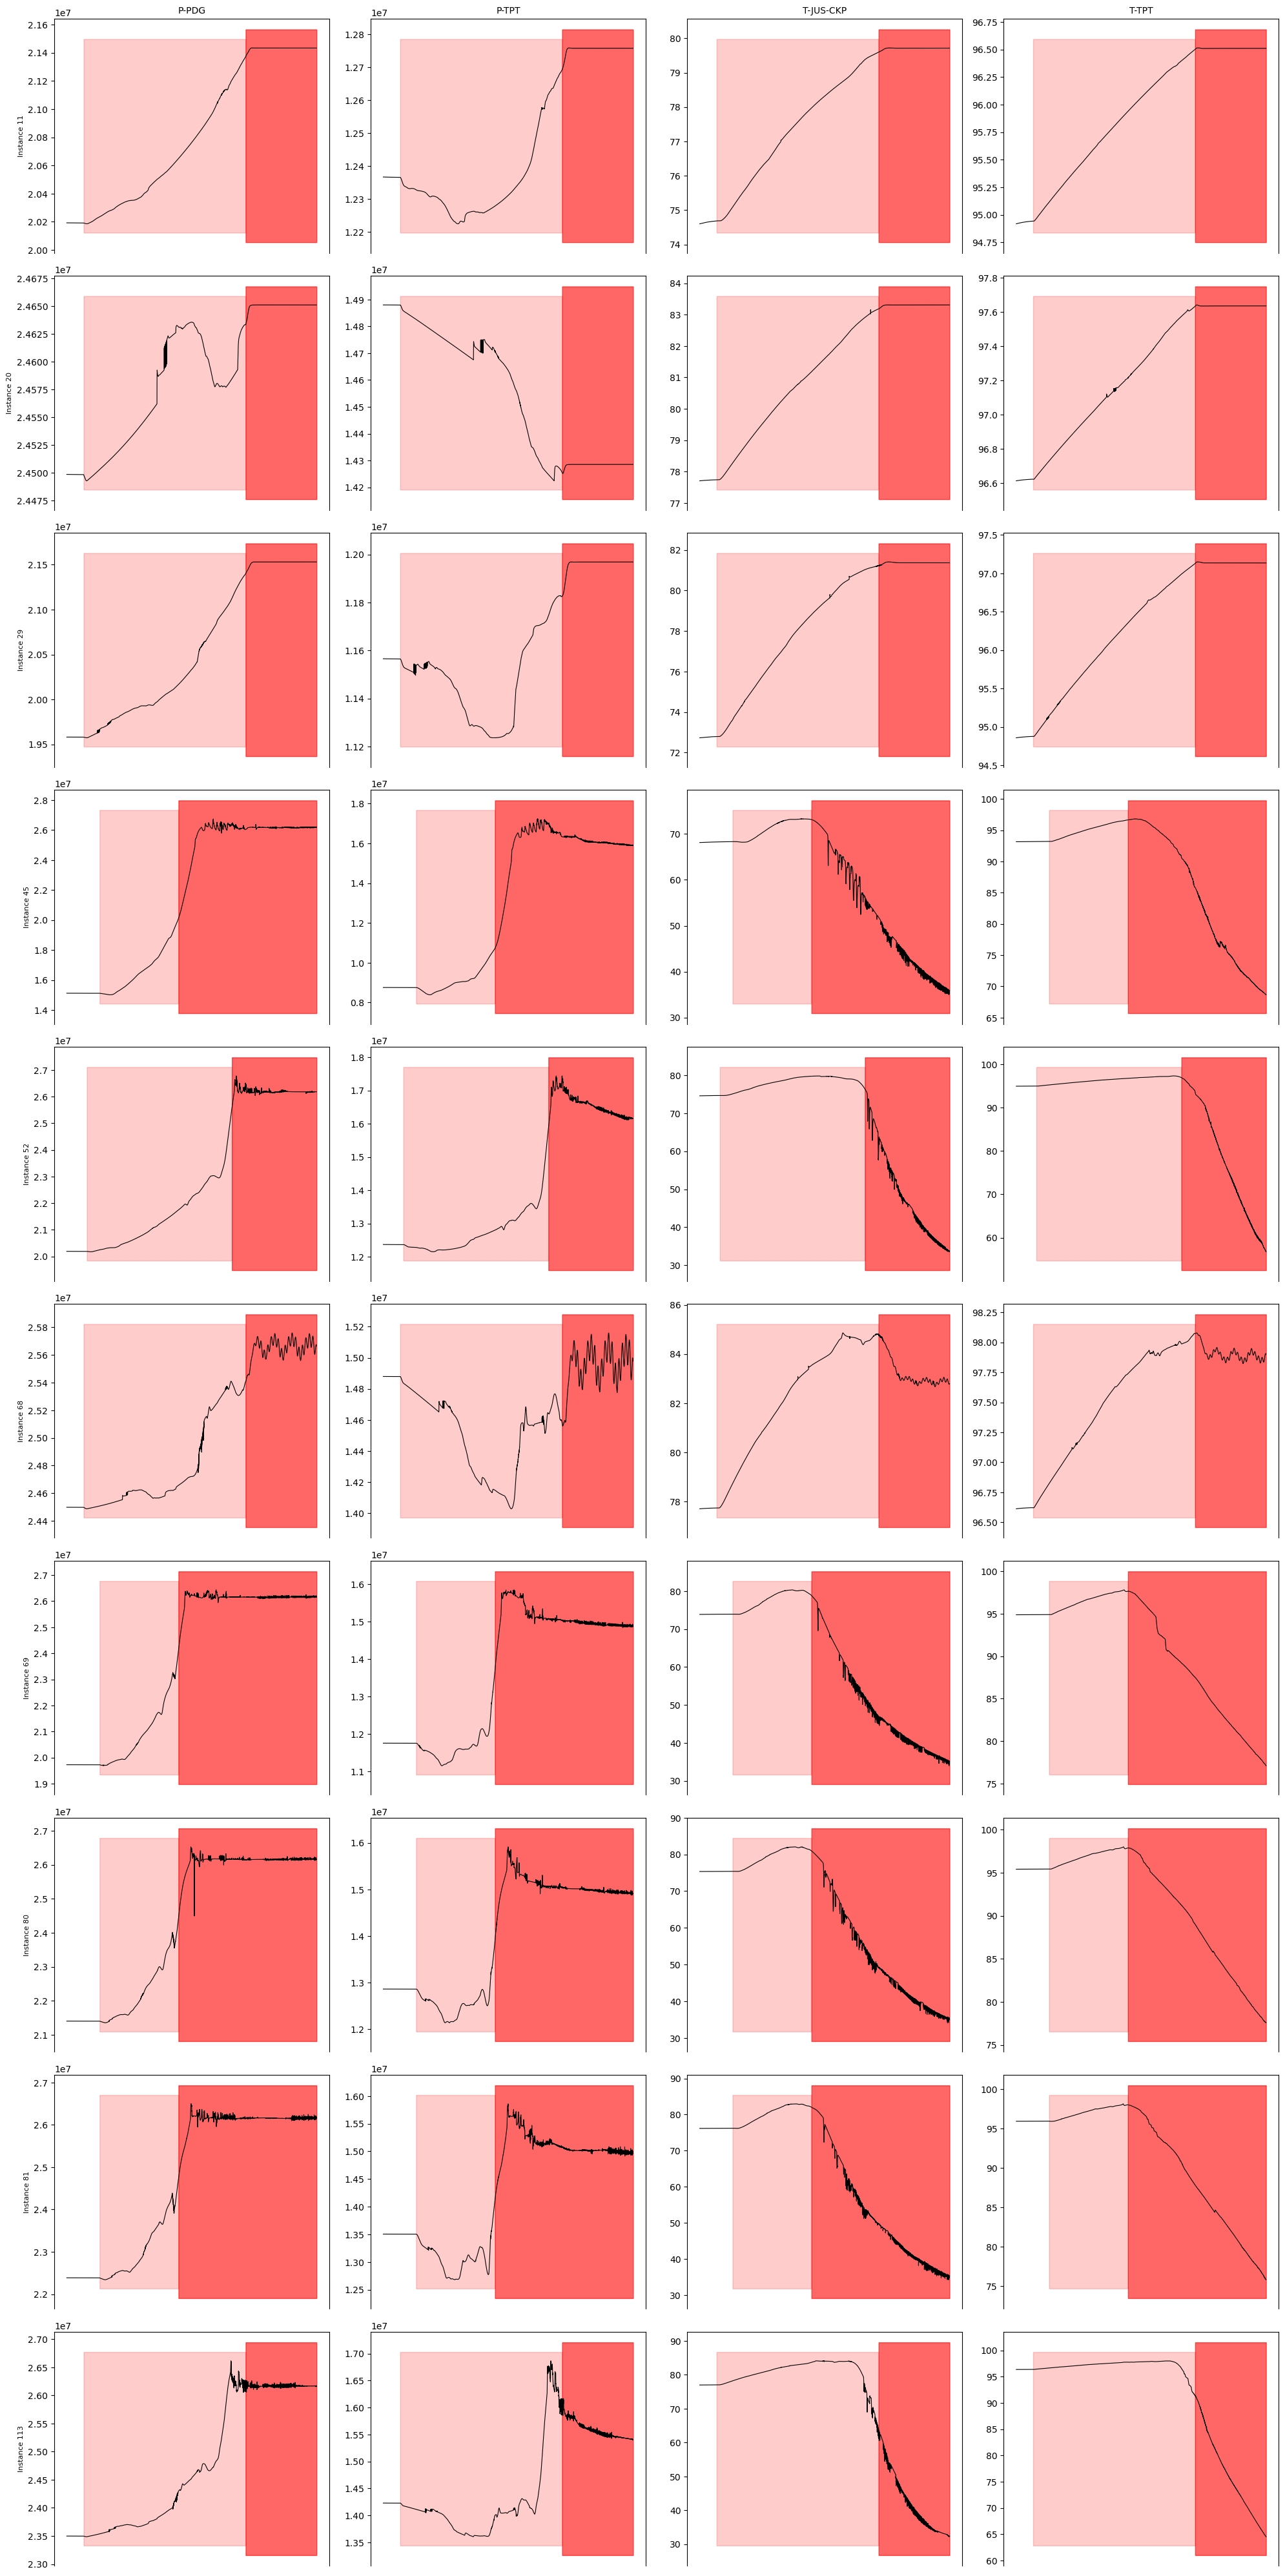

In [19]:
plot_faulty_instances_remove_cols(df_1, 'SIMULATED')

## 

## 3.2 Deep Dive into Event 2

Number of instances: 8


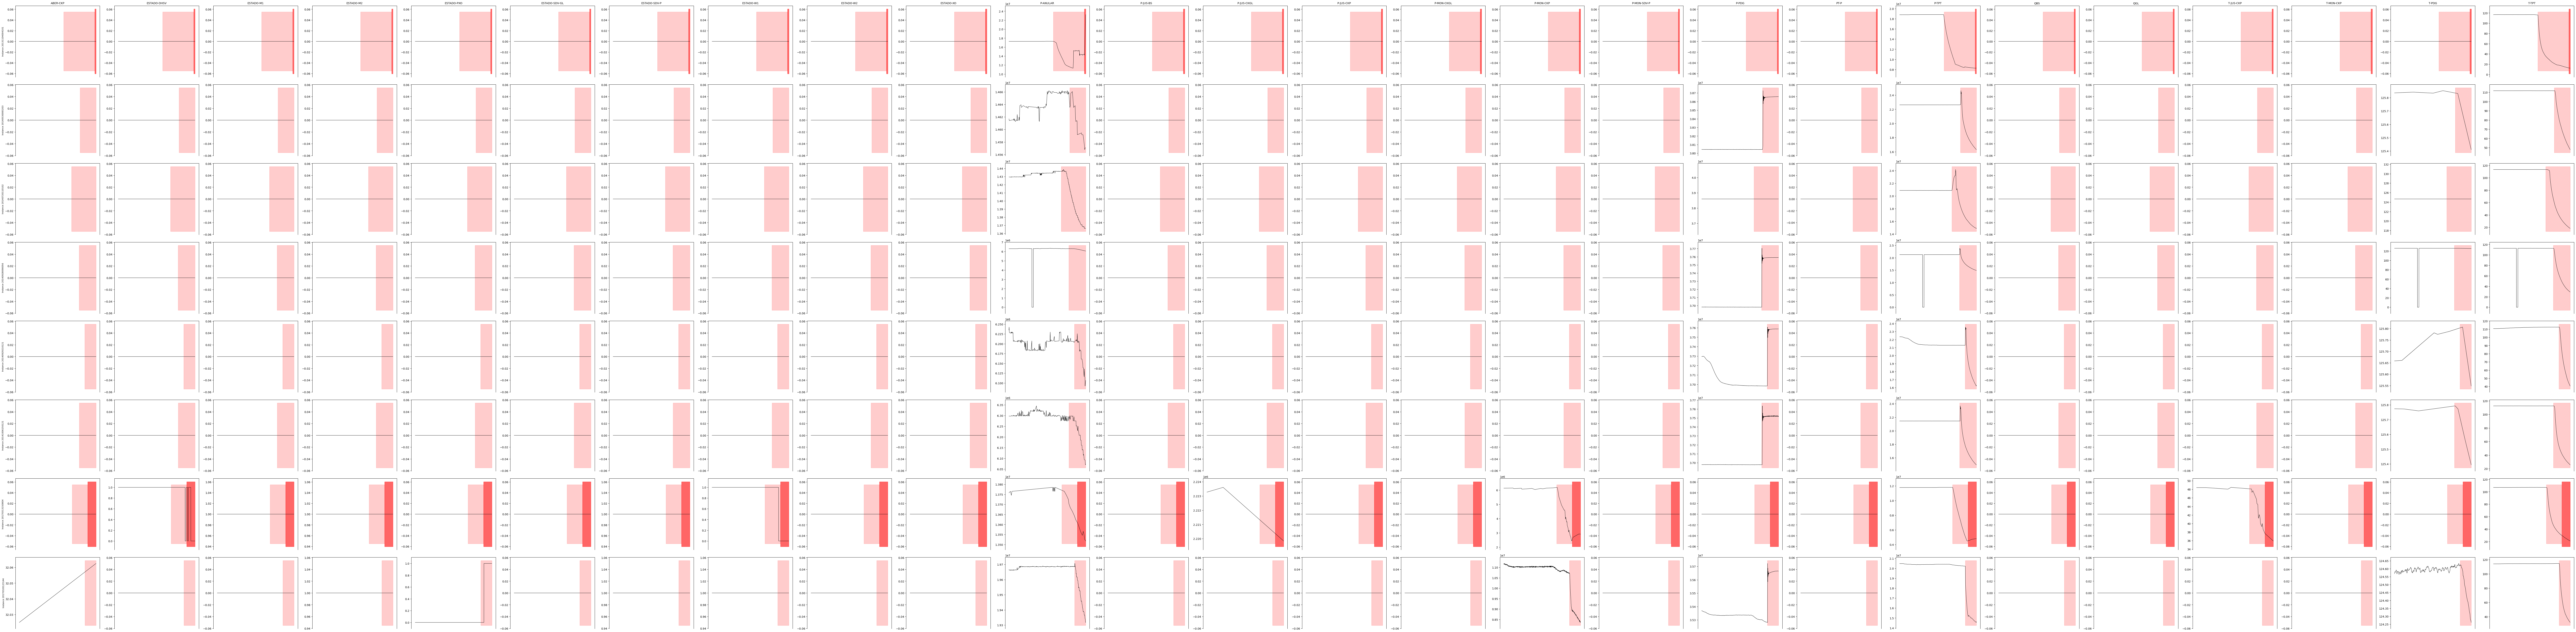

In [23]:
EVENT = 2
df_2 = events[EVENT]
df_2 = df_2.replace([np.inf, -np.inf], np.nan).fillna(0)

plot_faulty_instances(df_2, 'WELL')

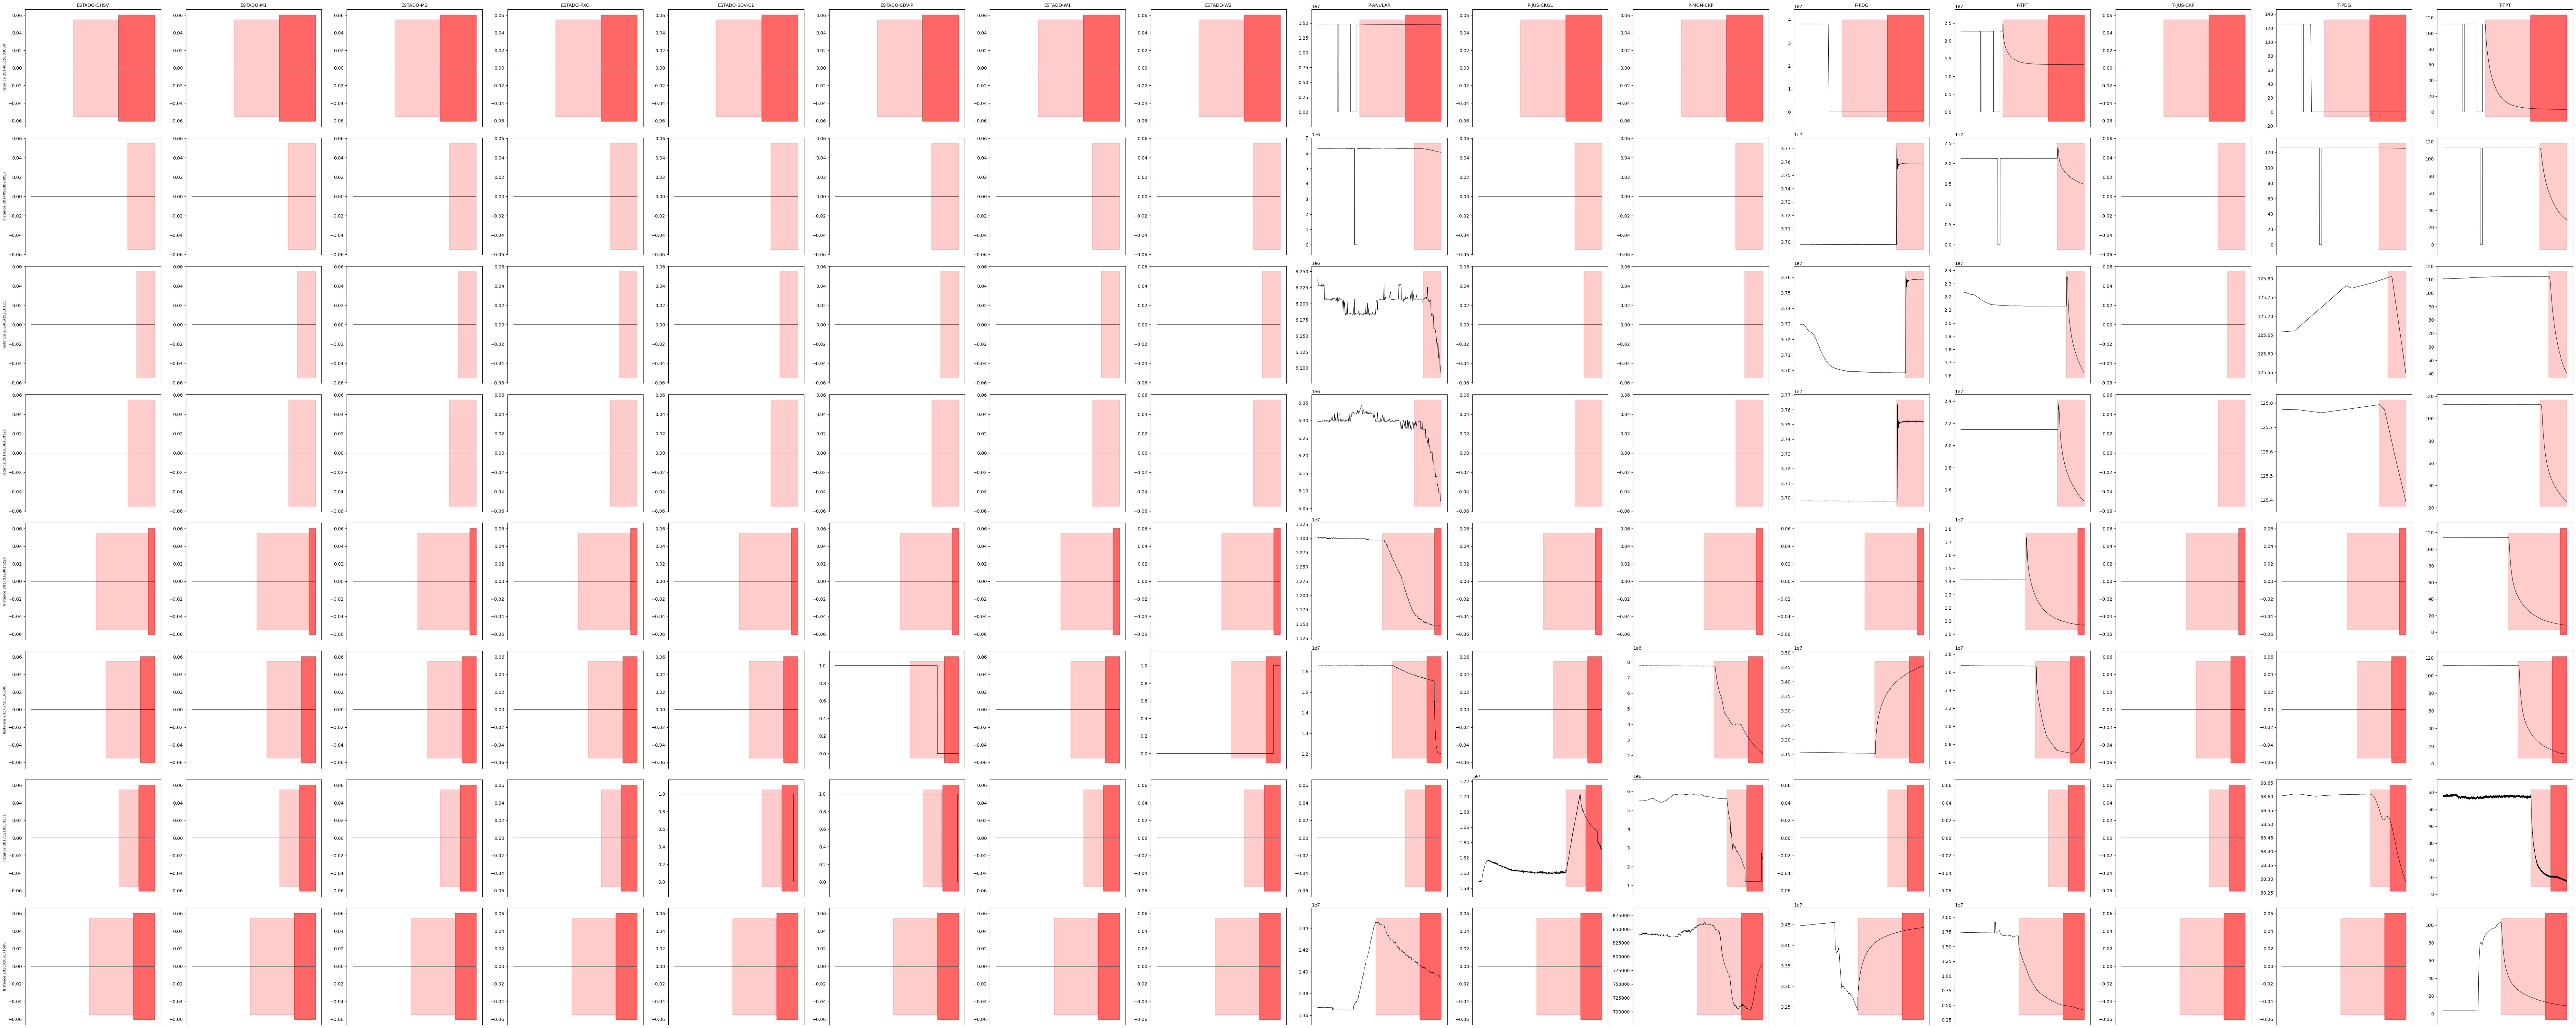

In [24]:
plot_faulty_instances_remove_cols(df_2, 'WELL')